### <font color='#00d2d3'> Importer les packages

In [57]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <font color='#00d2d3'> Importer et lire les données

In [58]:
# Importer les données
df1 = pd.read_csv('C:/Users/hp/Documents/nlp/tweet_data.csv')
df2 = pd.read_csv('C:/Users/hp/Documents/nlp/Tweets_data.csv')
# Afficher les données
df1.head()


,label,tweet
0,1,@user homegrown rightie white americans are 10...
1,1,"@user @user is this a new one? either way, #m..."
2,0,i am thankful for pillows. #thankful #positive...
3,0,it's unfounate today that aids is under contro...
4,0,i am super. #i_am #positive #affirmation


In [59]:
df2.head()

,coachella_sentiment,text
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...


- 1 : Negative
- 0 : Positive

In [60]:
# Dimension des données
print(df1.shape)
print(df2.shape)

(4484, 2)
(3846, 2)


In [61]:
# verifier les valeurs manquantes
df1.isnull().sum()

label    0
tweet    0
dtype: int64

In [62]:
# verifier les valeurs manquantes
df2.isnull().sum()

coachella_sentiment    0
text                   0
dtype: int64

### <font color='#00d2d3'> Pré-traitement des données

In [63]:
# Nombre d'observations dans chaque classe
df2.coachella_sentiment.value_counts()

coachella_sentiment
positive     2283
neutral       928
negative      553
cant tell      82
Name: count, dtype: int64

In [64]:
# Recuperation des lignes positive et negative 
df2 = df2[df2['coachella_sentiment'].isin(['positive', 'negative'])]

In [65]:
# Nombre d'observations dans chaque classe apres recuperation
df2.coachella_sentiment.value_counts()

coachella_sentiment
positive    2283
negative     553
Name: count, dtype: int64

In [66]:
# Renommer les colonnes pour les rendre cohérentes
df2 = df2.rename(columns={"coachella_sentiment": "label", "text": "tweet"})
df2.head(10000)

,label,tweet
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...
...,...,...
3759,negative,.@stromae at #coachella2015 is literally the o...
3760,negative,Anyone else not completely sold? #Coachella201...
3761,negative,Recycled as fuck #Coachella2015 #Coachella htt...
3762,negative,Line up out already or is it fake like every o...


In [67]:
# Modifier la colonne "label" pour rendre les labels cohérents
df2["label"] = df2["label"].replace({"positive": 0, "negative": 1})
df2.head(100000)

,label,tweet
0,0,#Coachella2015 tickets selling out in less tha...
1,0,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,0,#Coachella2015 #VIP passes secured! See you th...
3,0,PhillyÛªs @warondrugsjams will play #Coachell...
4,0,If briana and her mom out to #Coachella2015 i...
...,...,...
3759,1,.@stromae at #coachella2015 is literally the o...
3760,1,Anyone else not completely sold? #Coachella201...
3761,1,Recycled as fuck #Coachella2015 #Coachella htt...
3762,1,Line up out already or is it fake like every o...


In [68]:
# Concaténer les deux dataframes
df_en_tweet = pd.concat([df1, df2], ignore_index=True)

In [69]:
# Affiche le dataframe finale
df_en_tweet

,label,tweet
0,1,@user homegrown rightie white americans are 10...
1,1,"@user @user is this a new one? either way, #m..."
2,0,i am thankful for pillows. #thankful #positive...
3,0,it's unfounate today that aids is under contro...
4,0,i am super. #i_am #positive #affirmation
...,...,...
7315,1,.@stromae at #coachella2015 is literally the o...
7316,1,Anyone else not completely sold? #Coachella201...
7317,1,Recycled as fuck #Coachella2015 #Coachella htt...
7318,1,Line up out already or is it fake like every o...


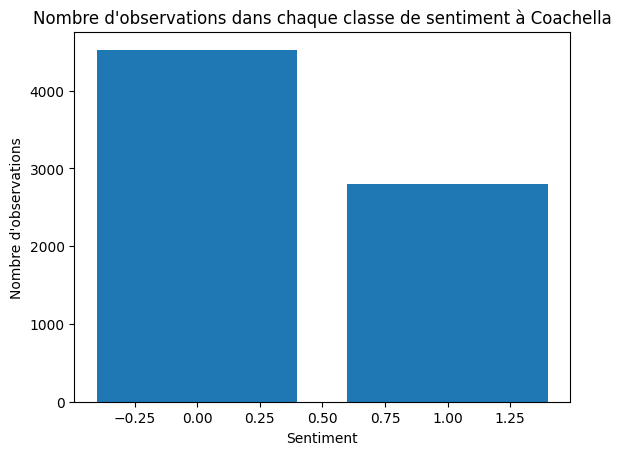

In [70]:
# Calculer le nombre d'observations pour chaque classe de sentiment
sentiment_counts = df_en_tweet['label'].value_counts()

# Créer un diagramme à barres
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Ajouter des étiquettes et afficher le graphique
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'observations')
plt.title('Nombre d\'observations dans chaque classe de sentiment à Coachella')
plt.show()


#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [71]:
# Afficher une ligne
df_en_tweet['tweet'][7317]

'Recycled as fuck #Coachella2015 #Coachella http://t.co/OvQ25JHrBy'

In [72]:
# Afficher la deuxième ligne de la colonne text
df_en_tweet['tweet'][2]

'i am thankful for pillows. #thankful #positive     '

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [73]:
# Fonction supprimant les liens
def remove_links(text):
    text = re.sub(r'http:?//\S+|https:?//\S+', '', text)
    return text


In [74]:
# Fonction supprimant les @username
def remove_users(text):
    text = re.sub(r'@[\w\-\.]+', '', text)  #re.sub(r'@[a-zA-Z0-9-._]+', '', text)
    return text


In [75]:
# Supprimer les adresses emails
def email_address(text):
    text = re.sub(r'[\w\-\.]+@[\w\-\.]+', '', text)
    return text

In [76]:
! pip install contractions

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import contractions
# Fonction étendant les contractions
def contraction(text):
    expanded_all = []
    for word in text.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [78]:
# Supprimer html caractères
def clean_html(text):
  text = re.sub(r'&\w+','', text)
  return text

In [79]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
  text = re.sub(r'[^a-zA-Z\s]+','', text)
  return text

In [80]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
    # Remplacer les espaces multiples par un seul espace
    text = re.sub(r'\s+',' ', text)

    # Convertir les majuscules en minuscules
    text = text.lower()
    return text

In [81]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
  text = text.strip()
  return text

In [82]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    text= ' '.join([word for word in text.split() if word not in Stopwords])
    return text

In [83]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    text = [lemma.lemmatize(word) for word in text.split()]
    text = " ".join(text)
    return text

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [84]:
# Appliquer la fonction remove_users
df_en_tweet['new_tweet'] = df_en_tweet.tweet.apply(func = remove_users)

# Appliquer la fonction remove_links
df_en_tweet['new_tweet']= df_en_tweet.new_tweet.apply(func = email_address)

# Appliquer la fonction email_address
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = remove_links)

# Appliquer la fonction remove_contraction
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = contraction)

# Appliquer la fonction clean_html
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = clean_html)

# Appliquer la fonction alpha_b
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = alpha_b)

# Appliquer la fonction lower
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = lower)

# Appliquer la fonction clean_space
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = clean_space)

# Appliquer la fonction remove_stopwords
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = remove_stopwords)

# Appliquer la fonction lem_sw
df_en_tweet['new_tweet'] = df_en_tweet.new_tweet.apply(func = lem_sw)


In [85]:
# Afficher df
df_en_tweet

,label,tweet,new_tweet
0,1,@user homegrown rightie white americans are 10...,homegrown rightie white american time likely h...
1,1,"@user @user is this a new one? either way, #m...",new one either way men disgraced harassment ve...
2,0,i am thankful for pillows. #thankful #positive...,thankful pillow thankful positive
3,0,it's unfounate today that aids is under contro...,unfounate today aid control hate kill gay year...
4,0,i am super. #i_am #positive #affirmation,super iam positive affirmation
...,...,...,...
7315,1,.@stromae at #coachella2015 is literally the o...,coachella literally reason want go rest line k...
7316,1,Anyone else not completely sold? #Coachella201...,anyone else completely sold coachella
7317,1,Recycled as fuck #Coachella2015 #Coachella htt...,recycled fuck coachella coachella
7318,1,Line up out already or is it fake like every o...,line already fake like every year coachella


In [86]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Diviser les données en features (X) et labels (y)
x = df_en_tweet. drop('label', axis=1)
# Assurez-vous d'ajuster le nom de la colonne si nécessaire
y = df_en_tweet[ 'label']
# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler (random_state=42)
# Appliquer la suréchantillonnage aux données
X_resampled, y_resampled = ros.fit_resample(x, y)
# Créer un nouveau DataFrame avec les données équilibrées 
df_en_tweet = pd. concat ([X_resampled, y_resampled], axis=1)
# Afficher la distribution des classes dans les données équilibrées 
print (df_en_tweet['label'].value_counts ())

label
1    4525
0    4525
Name: count, dtype: int64


### <font color='#00d2d3'> Vectorisation

In [87]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [88]:
# Nombre de mots
import json
voc_size = len(set(" ".join(df_en_tweet.new_tweet).split()))
# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')
# Entrainer les données
tokenizer.fit_on_texts(df_en_tweet['new_tweet'].values)
# Vectoriser
X = tokenizer.texts_to_sequences(df_en_tweet['new_tweet'].values)
# Padding
X = pad_sequences(X)
tokenizer_json = tokenizer.to_json()
with open ('tokenizer.json', 'w', encoding='utf-8') as json_file:
    json.dump(tokenizer_json, json_file, ensure_ascii=False)

In [89]:
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 5775, 5776,   15,  136,   26, 1141, 2309,  852,  307],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   19,   21,  456,   58,  105, 1913, 1038, 2310],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   94, 3854,   94,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 5777,   40, 3855,  853,   45,  224,  484, 5778,  253],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  254,  353,   96,  297]])

### <font color='#00d2d3'> Sentiment Analysis 

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

In [91]:
# Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 21, 100)           1157100   
                                                                 
 bidirectional (Bidirection  (None, 21, 400)           481600    
 al)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 21, 400)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 400)               961600    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

Separation des donnees 

In [92]:
# Importer train_test_split
from sklearn.model_selection import train_test_split
# Labels
y = df_en_tweet.label.values
# Splitter en train, validation et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [93]:
# Afficher les dimensions des ensembles
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (7240, 21) (7240,)
Validation set: (905, 21) (905,)
Test set: (905, 21) (905,)


Keras Turner pour trouver les hyperparametre du model

In [94]:
import tensorflow as tf
from tensorflow import keras

In [95]:
! pip install -q -U keras-tuner

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Embedding, Bidirectional, Dropout
from tensorflow.keras.layers import GRU

In [97]:
def model_builder(hp):
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    
    # Choose an optimal value between 100-256
    emb_dim = hp.Int('emb_dim', min_value=100, max_value=256, step=32)
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Choose an RNN type
    model_type = hp.Choice('rnn_type', values=['gru', 'lstm', 'bidirectional_gru', 'bidirectional_lstm'])
    
    model = Sequential()
    
    if model_type == 'gru':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(GRU(units=hp_units, return_sequences=True))
        model.add(Dropout(0.4))
        model.add(GRU(units=hp_units))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'lstm':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(LSTM(units=hp_units, return_sequences=True))
        model.add(Dropout(0.4))
        model.add(LSTM(units=hp_units))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'bidirectional_gru':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(Bidirectional(GRU(units=hp_units, return_sequences=True)))
        model.add(Dropout(0.4))
        model.add(Bidirectional(GRU(units=hp_units)))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'bidirectional_lstm':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(Bidirectional(LSTM(units=hp_units, return_sequences=True)))
        model.add(Dropout(0.4))
        model.add(Bidirectional(LSTM(units=hp_units)))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [98]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,  # Nombre total d'essais de modèles
    directory='my_dir',  # Répertoire pour enregistrer les résultats du tuner
    project_name='intro_to_kt'
)


In [99]:
# Supposons que X_train, y_train, X_val, y_val soient vos données d'entraînement et de validation

# Lancer la recherche d'hyperparamètres
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Récupérer les meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model_type = best_hps.get('rnn_type')

# Afficher les meilleurs hyperparamètres
print(f"""
Le type de modèle optimal est {best_model_type}.
Le nombre optimal d'unités dans la première couche dense est {best_hps.get('units')} 
et le taux d'apprentissage optimal pour l'optimiseur est {best_hps.get('learning_rate')}. 
et la dimension d'embedding optimale est {best_hps.get('emb_dim')}
""")


Trial 5 Complete [00h 06m 15s]
val_accuracy: 0.8839778900146484

Best val_accuracy So Far: 0.889502763748169
Total elapsed time: 00h 36m 19s

Le type de modèle optimal est bidirectional_lstm.
Le nombre optimal d'unités dans la première couche dense est 160 
et le taux d'apprentissage optimal pour l'optimiseur est 0.01. 
et la dimension d'embedding optimale est 228



In [100]:
tuner.results_summary()

Results summary
Results in my_dir\intro_to_kt
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 160
emb_dim: 228
learning_rate: 0.01
rnn_type: bidirectional_lstm
Score: 0.889502763748169

Trial 4 summary
Hyperparameters:
units: 96
emb_dim: 164
learning_rate: 0.001
rnn_type: bidirectional_lstm
Score: 0.8839778900146484

Trial 1 summary
Hyperparameters:
units: 512
emb_dim: 228
learning_rate: 0.01
rnn_type: gru
Score: 0.8795580267906189

Trial 0 summary
Hyperparameters:
units: 192
emb_dim: 132
learning_rate: 0.01
rnn_type: lstm
Score: 0.8773480653762817

Trial 3 summary
Hyperparameters:
units: 192
emb_dim: 100
learning_rate: 0.0001
rnn_type: bidirectional_lstm
Score: 0.8718231916427612


In [101]:
# Construire le modèle avec les hyperparamètres optimaux
model = tuner.hypermodel.build(best_hps)

# Entraîner le modèle sur les données pendant 50 époques
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Récupérer la précision de validation par époque
val_acc_per_epoch = history.history['val_accuracy']

# Trouver la meilleure époque basée sur la précision de validation
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))
print('Meilleure époque : %d' % (best_epoch,))


Epoch 1/5
227/227 [==============================] - 51s 197ms/step - loss: 0.4506 - accuracy: 0.7916 - val_loss: 0.3329 - val_accuracy: 0.8586
Epoch 2/5
227/227 [==============================] - 41s 180ms/step - loss: 0.1712 - accuracy: 0.9381 - val_loss: 0.3580 - val_accuracy: 0.8773
Epoch 3/5
227/227 [==============================] - 41s 183ms/step - loss: 0.0897 - accuracy: 0.9669 - val_loss: 0.3681 - val_accuracy: 0.8873
Epoch 4/5
227/227 [==============================] - 41s 181ms/step - loss: 0.0562 - accuracy: 0.9762 - val_loss: 0.4537 - val_accuracy: 0.8906
Epoch 5/5
227/227 [==============================] - 41s 182ms/step - loss: 0.0484 - accuracy: 0.9801 - val_loss: 0.7417 - val_accuracy: 0.8530
Meilleure époque : 3


In [103]:
# Construire à nouveau le modèle avec les meilleurs hyperparamètres
hypermodel = tuner.hypermodel.build(best_hps)

# Réentraîner le modèle sur toutes les données jusqu'à la meilleure époque identifiée (4 dans cet exemple)
hypermodel.fit(X_train, y_train, epochs=best_epoch)


Epoch 1/3
227/227 [==============================] - 50s 192ms/step - loss: 0.4590 - accuracy: 0.7870
Epoch 2/3
227/227 [==============================] - 47s 206ms/step - loss: 0.1753 - accuracy: 0.9341
Epoch 3/3
227/227 [==============================] - 47s 208ms/step - loss: 0.0993 - accuracy: 0.9631


In [104]:
# Évaluer les performances du modèle sur l'ensemble de validation
eval_result = hypermodel.evaluate(X_val, y_val)

# Afficher les résultats
print(f"Loss sur l'ensemble de validation : {eval_result[0]}")
print(f"Précision sur l'ensemble de validation : {eval_result[1]}")


29/29 [==============================] - 4s 83ms/step - loss: 0.4402 - accuracy: 0.8707
Loss sur l'ensemble de validation : 0.44023385643959045
Précision sur l'ensemble de validation : 0.870718240737915


In [126]:
# Enregistrer le modèle 
hypermodel.save('Sentiment_Analysis_en.h5')


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###### <font color='#1dd1a1'> Test le modèle

In [123]:
# x_text text non vectorisées
tweet = tokenizer.sequences_to_texts(X_test[1:6])
# x_text text vectorisées
twt = X_test[1:6]
print(tweet)

['fuck coachella', 'dear please give u multiracial objective list prove selection', 'christina grimmies last performance shot via christinarip voice christinagrimmie', 'rebellion uk dontbuythesun rag spread tory propaganda fear hatred', 'hour thy uncle sayeth disturb pay']


In [124]:
# Prédictions les labels
y_pred=model.predict(twt)
# Arrondir les valeus
y_pred = np.round(y_pred)

1/1 [==============================] - 0s 98ms/step


In [125]:
# Afficher les sentiments prédits
for i in range(0, 5):
    print(tweet[i], "---------", ["Negative sentiment" if int(y_pred[i]) == 0 else "Positive sentiment"])

fuck coachella --------- ['Positive sentiment']
dear please give u multiracial objective list prove selection --------- ['Positive sentiment']
christina grimmies last performance shot via christinarip voice christinagrimmie --------- ['Negative sentiment']
rebellion uk dontbuythesun rag spread tory propaganda fear hatred --------- ['Positive sentiment']
hour thy uncle sayeth disturb pay --------- ['Negative sentiment']


C:\Users\HP\AppData\Local\Temp\ipykernel_20228\3629067660.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(tweet[i], "---------", ["Negative sentiment" if int(y_pred[i]) == 0 else "Positive sentiment"])
